In [6]:
####Preparingthedata####

import pandas as pd
import numpy as np
import datetime as dr
from pathlib import Path

In [7]:
whale_data = Path(r"C:\Users\reide\OneDrive\Desktop\UTOR-VIRT-FIN-PT-11-2022-U-LOLC-main\04-Pandas\Unit 4 Homework\Instructions\Starter_Code\Resources\whale_returns.csv")
algo_data = Path(r"C:\Users\reide\OneDrive\Desktop\UTOR-VIRT-FIN-PT-11-2022-U-LOLC-main\04-Pandas\Unit 4 Homework\Instructions\Starter_Code\Resources\algo_returns.csv")
sptsx_data = Path(r"C:\Users\reide\OneDrive\Desktop\UTOR-VIRT-FIN-PT-11-2022-U-LOLC-main\04-Pandas\Unit 4 Homework\Instructions\Starter_Code\Resources\sp_tsx_history.csv")

whale = pd.read_csv(whale_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
algo = pd.read_csv(algo_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
sptsx = pd.read_csv(sptsx_data, index_col="Date", infer_datetime_format=True, parse_dates=True)

In [8]:
whale.sort_index()
algo.sort_index()
sptsx.sort_index()

whale.head()
algo.head()
sptsx.head()

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [9]:
whale.isnull().sum()
whale.dtypes
print(whale.dtypes)
print(whale.isnull().sum())

whale.dropna()

SOROS FUND MANAGEMENT LLC      float64
PAULSON & CO.INC.              float64
TIGER GLOBAL MANAGEMENT LLC    float64
BERKSHIRE HATHAWAY INC         float64
dtype: object
SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [10]:
algo.isnull().sum()
algo.dtypes
print(algo.dtypes)
print(algo.isnull().sum())

algo.dropna()

Algo 1    float64
Algo 2    float64
dtype: object
Algo 1    0
Algo 2    6
dtype: int64


,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [11]:
sptsx["Close"]= sptsx["Close"].str.replace("$", "")
sptsx["Close"]= sptsx["Close"].str.replace(",", "")

sptsx.head()

C:\Users\reide\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99


In [12]:
sptsx['Close'] = sptsx['Close'].astype('float')

In [13]:
sptsx.head()

,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99


In [28]:
sptsx.dtypes

Close    float64
dtype: object

In [14]:
sptsx_daily_returns = sptsx.pct_change()
print(sptsx_daily_returns)

               Close
Date                
2012-10-01       NaN
2012-10-02  0.001701
2012-10-03 -0.002563
2012-10-04  0.007137
2012-10-05 -0.002305
...              ...
2019-12-20  0.003188
2019-12-23  0.000600
2019-12-24  0.003003
2019-12-27 -0.000695
2019-12-30 -0.004057

[1818 rows x 1 columns]


In [16]:
combined_df = pd.concat([whale, algo, sptsx_daily_returns], axis="columns", join="inner")
print(combined_df)

            SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-02                        NaN                 NaN   
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   
...                               ...                 ...   
2019-04-25                  -0.000285           -0.001291   
2019-04-26                   0.008149            0.009162   
2019-04-29                   0.001254            0.002719   
2019-04-30                  -0.001295           -0.002211   
2019-05-01                  -0.005847           -0.001341   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2015-03-02                          NaN             

<AxesSubplot:xlabel='Date'>

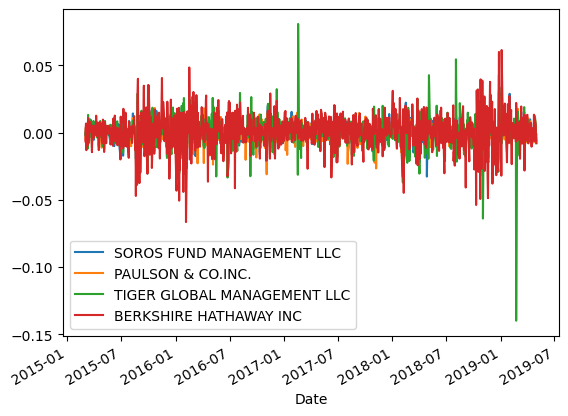

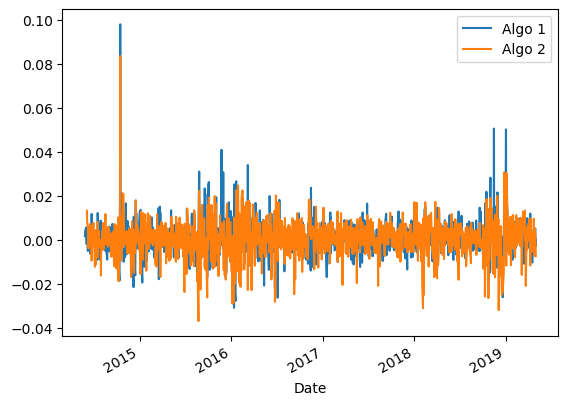

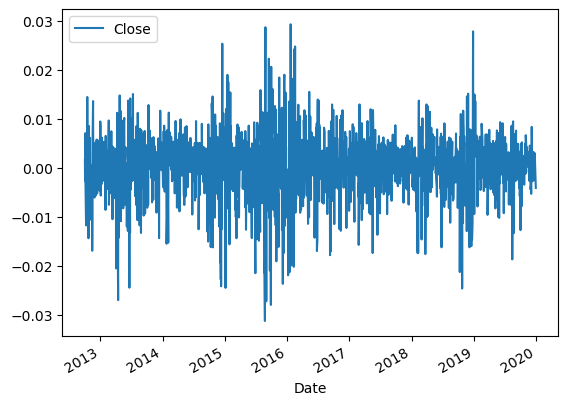

In [65]:
####Conduct Quantative Analysis####
#Performance Analysis#

whale.plot()
algo.plot()
sptsx_daily_returns.plot()

<AxesSubplot:xlabel='Date'>

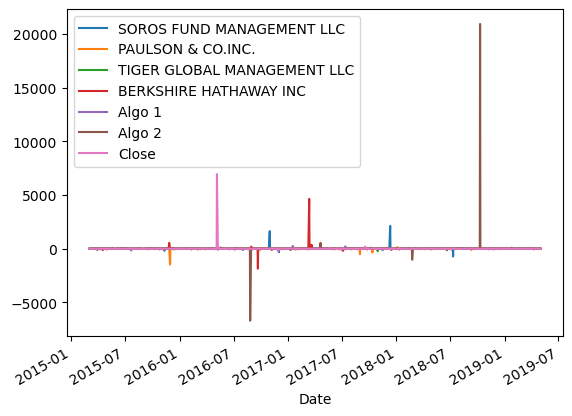

In [20]:
combined_daily_returns = combined_df.pct_change()

combined_daily_returns.plot()

<AxesSubplot:title={'center':'Portfolio Risk'}>

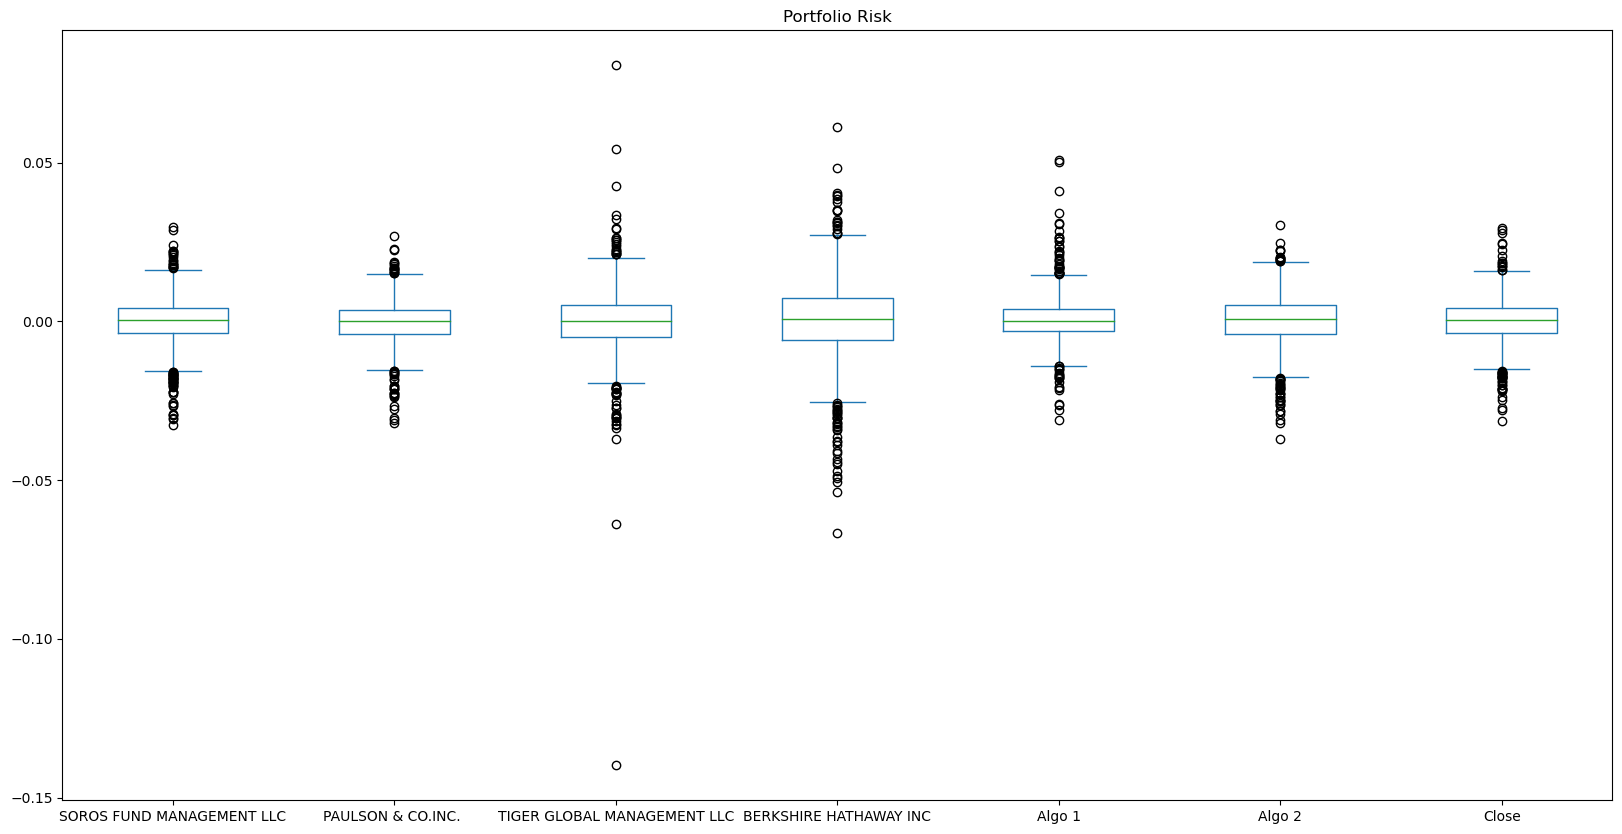

In [54]:
#Risk Analysis#

combined_df.plot.box(figsize=(20, 10), title = "Portfolio Risk")

In [63]:
whale_std = whale.std()
algo_std = algo.std()
sptsx_daily_returns_std = sptsx.std()

print(whale_std)
print(algo_std)
print(sptsx_std)

SOROS FUND MANAGEMENT LLC      0.007842
PAULSON & CO.INC.              0.006977
TIGER GLOBAL MANAGEMENT LLC    0.010824
BERKSHIRE HATHAWAY INC         0.012831
dtype: float64
Algo 1    0.007972
Algo 2    0.008466
dtype: float64
Close    1328.337613
dtype: float64


In [67]:
# Determine which portfolios are riskier than the S&P TSX 60

annual_std_whale = whale.rolling(window=252).std()
annual_std_algo = algo.rolling(window=252).std()
annual_std_sptsx = sptsx_daily_returns.rolling(window=252).std()

annual_std_combined = combined_df.rolling(window=252).std()

print(annual_std_whale)
print(annual_std_algo)
print(annual_std_sptsx)
print(annual_std_combined)

            SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-02                        NaN                 NaN   
2015-03-03                        NaN                 NaN   
2015-03-04                        NaN                 NaN   
2015-03-05                        NaN                 NaN   
2015-03-06                        NaN                 NaN   
...                               ...                 ...   
2019-04-25                   0.009327            0.007337   
2019-04-26                   0.009340            0.007358   
2019-04-29                   0.009330            0.007355   
2019-04-30                   0.009095            0.007356   
2019-05-01                   0.009100            0.007318   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
Date                                                             
2015-03-02                          NaN                     NaN  
2015-03-

In [75]:
####Rolling Statistics####

annual_std21_whale = whale.rolling(window=21).std()
annual_std21_algo = algo.rolling(window=21).std()
annual_std21_sptsx = sptsx_daily_returns.rolling(window=21).std()

print(annual_std21_whale)
print(annual_std21_algo)
print(annual_std21_sptsx)

            SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-02                        NaN                 NaN   
2015-03-03                        NaN                 NaN   
2015-03-04                        NaN                 NaN   
2015-03-05                        NaN                 NaN   
2015-03-06                        NaN                 NaN   
...                               ...                 ...   
2019-04-25                   0.004145            0.005572   
2019-04-26                   0.004117            0.005649   
2019-04-29                   0.004123            0.005374   
2019-04-30                   0.004199            0.005408   
2019-05-01                   0.004271            0.005009   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
Date                                                             
2015-03-02                          NaN                     NaN  
2015-03-

<AxesSubplot:xlabel='Date'>

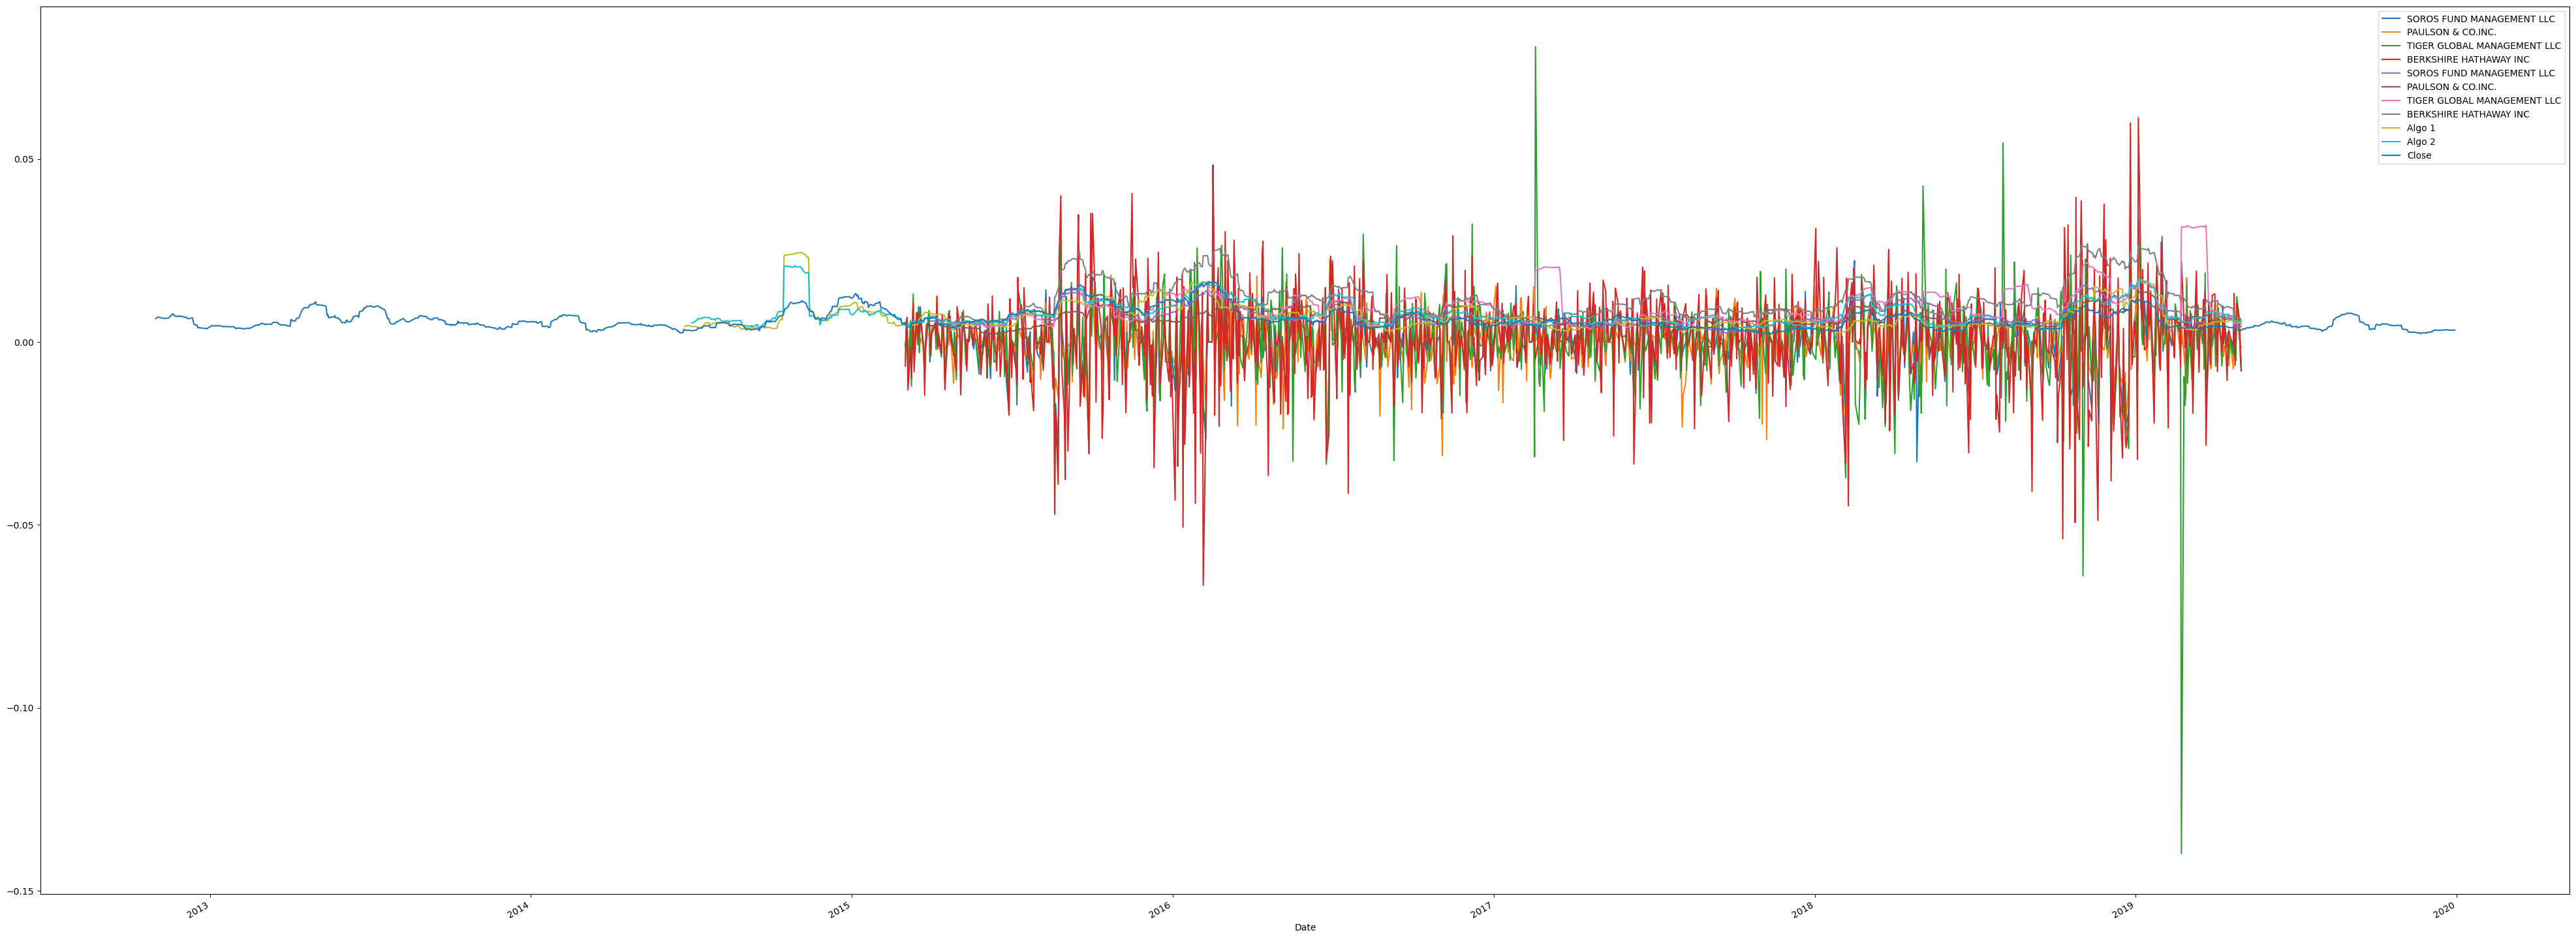

In [76]:
ax = whale.plot(figsize=(50, 20))
annual_std21_whale.plot(ax=ax)
annual_std21_algo.plot(ax=ax)
annual_std21_sptsx.plot(ax=ax)

In [22]:
correlation = combined_daily_returns.corr()
print(correlation)

                             SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
SOROS FUND MANAGEMENT LLC                     1.000000            0.002845   
PAULSON & CO.INC.                             0.002845            1.000000   
TIGER GLOBAL MANAGEMENT LLC                   0.022161            0.035728   
BERKSHIRE HATHAWAY INC                        0.000450            0.002077   
Algo 1                                       -0.000134            0.006478   
Algo 2                                       -0.005714            0.010906   
Close                                        -0.002526            0.004439   

                             TIGER GLOBAL MANAGEMENT LLC  \
SOROS FUND MANAGEMENT LLC                       0.022161   
PAULSON & CO.INC.                               0.035728   
TIGER GLOBAL MANAGEMENT LLC                     1.000000   
BERKSHIRE HATHAWAY INC                         -0.011667   
Algo 1                                         -0.002474   
Algo 2         

<AxesSubplot:>

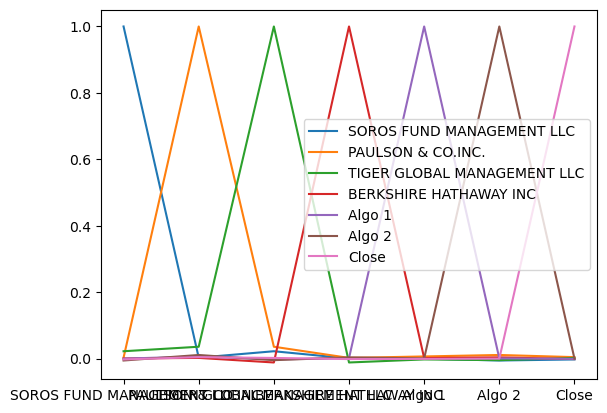

In [25]:
correlation.plot()

In [56]:
##calculate covariance of single portfolio##

covariance = combined_df["SOROS FUND MANAGEMENT LLC"].rolling(window=60).cov(combined_df["Close"])
print(covariance)

Date
2015-03-02         NaN
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
                ...   
2019-04-25    0.000014
2019-04-26    0.000014
2019-04-29    0.000013
2019-04-30    0.000013
2019-05-01    0.000014
Length: 1030, dtype: float64


In [58]:
variance = combined_df["Close"].rolling(60).var()
print(variance)

Date
2015-03-02         NaN
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
                ...   
2019-04-25    0.000015
2019-04-26    0.000015
2019-04-29    0.000015
2019-04-30    0.000015
2019-05-01    0.000015
Name: Close, Length: 1030, dtype: float64


In [59]:
beta = covariance/variance
print(beta)

Date
2015-03-02         NaN
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
                ...   
2019-04-25    0.913204
2019-04-26    0.918302
2019-04-29    0.844689
2019-04-30    0.893528
2019-05-01    0.939908
Length: 1030, dtype: float64


<AxesSubplot:title={'center':'Whale-SOROS Portfolio Beta'}, xlabel='Date'>

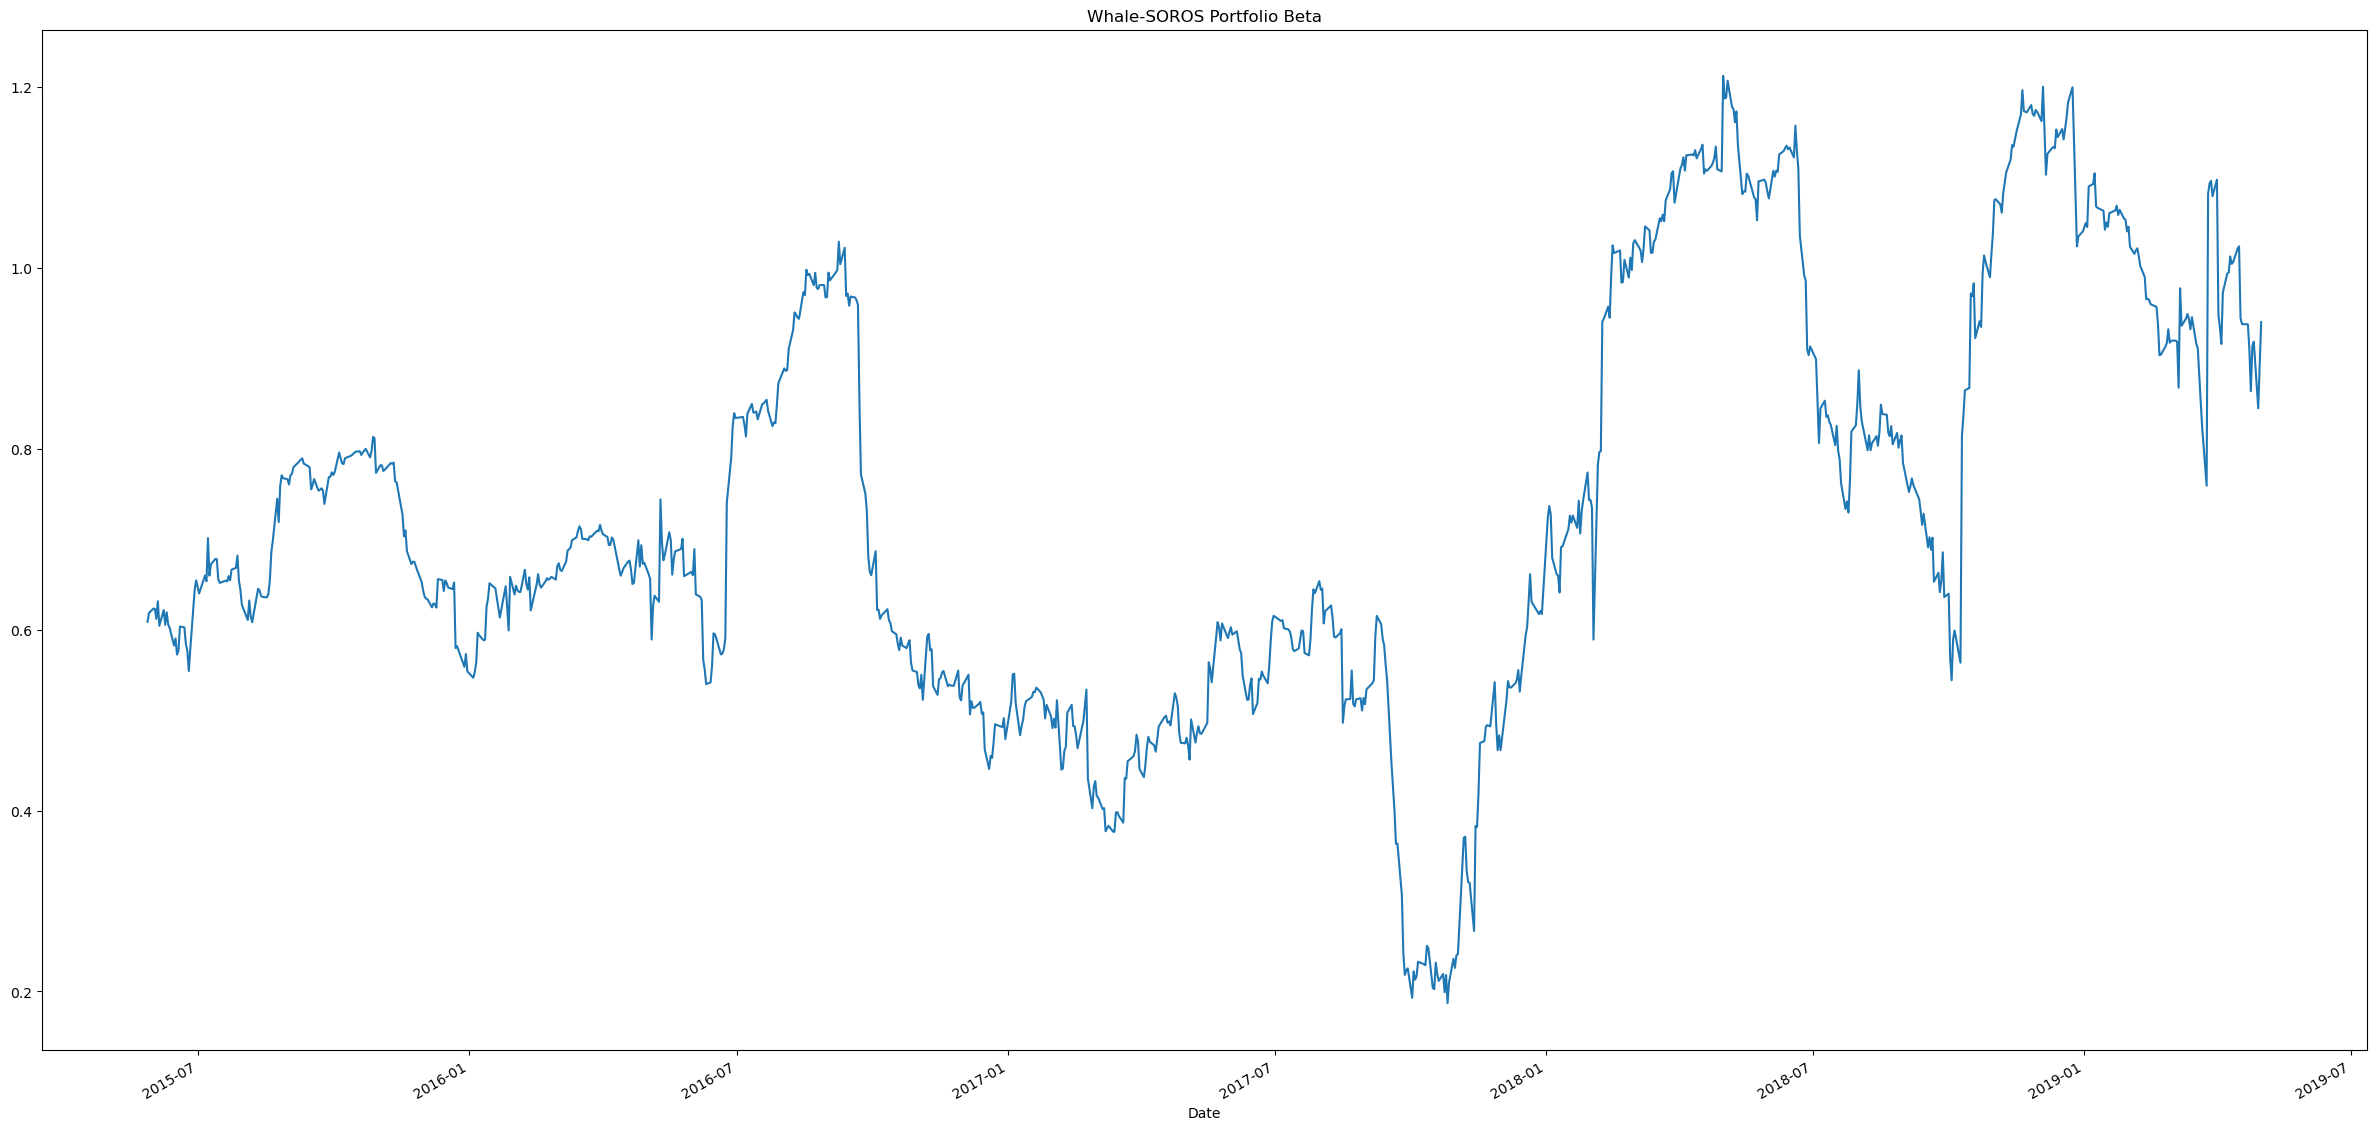

In [61]:
beta.plot(figsize=(30, 15), title="Whale-SOROS Portfolio Beta")

In [38]:
####Rolling stat - EWM####

whale["EWM"] = whale['SOROS FUND MANAGEMENT LLC'].ewm(span=21, adjust=False).std()
EWM_WHALE = whale["EWM"]
print(EWM_WHALE)

whale["EWM"] = whale['TIGER GLOBAL MANAGEMENT LLC'].ewm(span=21, adjust=False).std()
EWM_WHALE2 = whale["EWM"]
print(EWM_WHALE2)

whale["EWM"] = whale['BERKSHIRE HATHAWAY INC'].ewm(span=21, adjust=False).std()
EWM_WHALE3 = whale["EWM"]
print(EWM_WHALE3)

algo["EWM"] = algo['Algo 1'].ewm(span=21, adjust=False).std()
EWM_ALGO1 = algo["EWM"]
print(EWM_ALGO1)

algo["EWM"] = algo['Algo 2'].ewm(span=21, adjust=False).std()
EWM_ALGO2 = algo["EWM"]
print(EWM_ALGO2)

Date
2015-03-02         NaN
2015-03-03         NaN
2015-03-04    0.002472
2015-03-05    0.003128
2015-03-06    0.004173
                ...   
2019-04-25    0.004773
2019-04-26    0.004944
2019-04-29    0.004722
2019-04-30    0.004612
2019-05-01    0.004940
Name: EWM, Length: 1060, dtype: float64
Date
2015-03-02         NaN
2015-03-03         NaN
2015-03-04    0.001441
2015-03-05    0.001886
2015-03-06    0.003918
                ...   
2019-04-25    0.007946
2019-04-26    0.008453
2019-04-29    0.008218
2019-04-30    0.007849
2019-05-01    0.007948
Name: EWM, Length: 1060, dtype: float64
Date
2015-03-02         NaN
2015-03-03         NaN
2015-03-04    0.007624
2015-03-05    0.008393
2015-03-06    0.007839
                ...   
2019-04-25    0.007527
2019-04-26    0.007608
2019-04-29    0.007294
2019-04-30    0.007219
2019-05-01    0.007499
Name: EWM, Length: 1060, dtype: float64
Date
2014-05-28         NaN
2014-05-29    0.001579
2014-05-30    0.001725
2014-06-02    0.002105
2014-06-0

In [63]:
####Sharpe Ratios####

sharpe_ratio = (combined_daily_returns.mean() * 252)/(combined_daily_returns.std() * np.sqrt(252))
print(sharpe_ratio)

SOROS FUND MANAGEMENT LLC           NaN
PAULSON & CO.INC.                   NaN
TIGER GLOBAL MANAGEMENT LLC         NaN
BERKSHIRE HATHAWAY INC              NaN
Algo 1                        -0.798853
Algo 2                         0.271578
Close                          0.406512
dtype: float64


<AxesSubplot:title={'center':'Sharpe Ratio of combined returns'}>

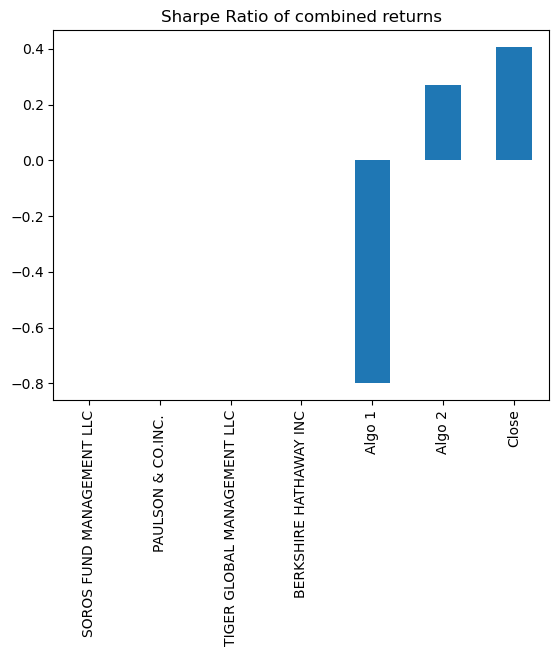

In [64]:
sharpe_ratio.plot(kind="bar", title="Sharpe Ratio of combined returns")

###Analysis Answer -Algo Strat### Based on the information given above the algorithmic strategies do not outpeform the sptsx which makes sense because alot of the algorithmic strategies rely on copying/mimicing
similar moves as to how the different market indexs, such as the sptsx, is behaving. As a result the algorithms results will have a very similar risk profile and returns
relative to the sptsx. The whale investor portfolio becuase of the nature of whale investing having to do with alot more market sentiment and less quantifiable concepts such as
algo trading or indexing there will be an inherent larger profile of risk as human error has more limitations in exact calculations of mitigating risk and a result they are able
to use more traditional risk approaches such as value methods or more historical methods of taking on risk which will naturally have a higher variance and standard deviation as
we can see from the data prestend above.

In [65]:
otex_data = Path(r"C:\Users\reide\OneDrive\Desktop\UTOR-VIRT-FIN-PT-11-2022-U-LOLC-main\04-Pandas\Unit 4 Homework\Instructions\Starter_Code\Resources\otex_historical.csv")
l_data = Path(r"C:\Users\reide\OneDrive\Desktop\UTOR-VIRT-FIN-PT-11-2022-U-LOLC-main\04-Pandas\Unit 4 Homework\Instructions\Starter_Code\Resources\l_historical.csv")
shop_data = Path(r"C:\Users\reide\OneDrive\Desktop\UTOR-VIRT-FIN-PT-11-2022-U-LOLC-main\04-Pandas\Unit 4 Homework\Instructions\Starter_Code\Resources\shop_historical.csv")

In [66]:
otex = pd.read_csv(otex_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
l = pd.read_csv(l_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
shop = pd.read_csv(shop_data, index_col="Date", infer_datetime_format=True, parse_dates=True)

print(otex)
print(l)
print(shop)

           Symbol  Close
Date                    
2018-01-02   OTEX  43.58
2018-01-03   OTEX  43.07
2018-01-04   OTEX  42.91
2018-01-05   OTEX  42.57
2018-01-08   OTEX  42.16
...           ...    ...
2019-12-20   OTEX  58.68
2019-12-23   OTEX  57.89
2019-12-24   OTEX  57.44
2019-12-27   OTEX  57.70
2019-12-30   OTEX  57.19

[501 rows x 2 columns]
           Symbol  Close
Date                    
2018-01-02      L  57.99
2018-01-03      L  57.41
2018-01-04      L  57.42
2018-01-05      L  57.42
2018-01-08      L  56.86
...           ...    ...
2019-12-20      L  67.90
2019-12-23      L  67.68
2019-12-24      L  67.67
2019-12-27      L  67.78
2019-12-30      L  67.33

[501 rows x 2 columns]
           Symbol   Close
Date                     
2018-01-02   SHOP  132.06
2018-01-03   SHOP  135.15
2018-01-04   SHOP  137.46
2018-01-05   SHOP  137.26
2018-01-08   SHOP  139.51
...           ...     ...
2019-12-20   SHOP  513.22
2019-12-23   SHOP  511.62
2019-12-24   SHOP  525.39
2019-12-27   SHO

In [67]:
df_combined = pd.concat([otex, l, shop])
print(df_combined)

           Symbol   Close
Date                     
2018-01-02   OTEX   43.58
2018-01-03   OTEX   43.07
2018-01-04   OTEX   42.91
2018-01-05   OTEX   42.57
2018-01-08   OTEX   42.16
...           ...     ...
2019-12-20   SHOP  513.22
2019-12-23   SHOP  511.62
2019-12-24   SHOP  525.39
2019-12-27   SHOP  534.76
2019-12-30   SHOP  517.79

[1503 rows x 2 columns]


In [68]:
df_combined.sort_index()

,Symbol,Close
Date,,
2018-01-02,OTEX,43.58
2018-01-02,SHOP,132.06
2018-01-02,L,57.99
2018-01-03,OTEX,43.07
2018-01-03,SHOP,135.15
...,...,...
2019-12-27,OTEX,57.70
2019-12-27,L,67.78
2019-12-30,L,67.33


In [69]:
df_combined_daily_returns = df_combined.pct_change
combined_daily_returns.dropna()
print(df_combined_daily_returns)

<bound method NDFrame.pct_change of            Symbol   Close
Date                     
2018-01-02   OTEX   43.58
2018-01-03   OTEX   43.07
2018-01-04   OTEX   42.91
2018-01-05   OTEX   42.57
2018-01-08   OTEX   42.16
...           ...     ...
2019-12-20   SHOP  513.22
2019-12-23   SHOP  511.62
2019-12-24   SHOP  525.39
2019-12-27   SHOP  534.76
2019-12-30   SHOP  517.79

[1503 rows x 2 columns]>


In [70]:
df_combined_daily_returns = df_combined.pct_change
print(df_combined_daily_returns)

<bound method NDFrame.pct_change of            Symbol   Close
Date                     
2018-01-02   OTEX   43.58
2018-01-03   OTEX   43.07
2018-01-04   OTEX   42.91
2018-01-05   OTEX   42.57
2018-01-08   OTEX   42.16
...           ...     ...
2019-12-20   SHOP  513.22
2019-12-23   SHOP  511.62
2019-12-24   SHOP  525.39
2019-12-27   SHOP  534.76
2019-12-30   SHOP  517.79

[1503 rows x 2 columns]>


In [85]:
df_combined2 = pd.concat([df_combined, df_combined_daily_returns])

TypeError: cannot concatenate object of type '<class 'method'>'; only Series and DataFrame objs are valid

In [73]:
annual_std = df_combined.rolling(window=21).std()
print(annual_std)

                Close
Date                 
2018-01-02        NaN
2018-01-03        NaN
2018-01-04        NaN
2018-01-05        NaN
2018-01-08        NaN
...               ...
2019-12-20  32.030897
2019-12-23  29.696679
2019-12-24  27.630205
2019-12-27  27.542133
2019-12-30  26.597450

[1503 rows x 1 columns]


In [74]:
annual_std21_otex = otex.rolling(window=21).std()
annual_std21_l = l.rolling(window=21).std()
annual_std21_shop = shop.rolling(window=21).std()

print(annual_std21_otex)
print(annual_std21_l)
print(annual_std21_shop)

               Close
Date                
2018-01-02       NaN
2018-01-03       NaN
2018-01-04       NaN
2018-01-05       NaN
2018-01-08       NaN
...              ...
2019-12-20  0.853264
2019-12-23  0.861196
2019-12-24  0.836704
2019-12-27  0.750055
2019-12-30  0.695230

[501 rows x 1 columns]
               Close
Date                
2018-01-02       NaN
2018-01-03       NaN
2018-01-04       NaN
2018-01-05       NaN
2018-01-08       NaN
...              ...
2019-12-20  1.449143
2019-12-23  1.597104
2019-12-24  1.717774
2019-12-27  1.791484
2019-12-30  1.870783

[501 rows x 1 columns]
                Close
Date                 
2018-01-02        NaN
2018-01-03        NaN
2018-01-04        NaN
2018-01-05        NaN
2018-01-08        NaN
...               ...
2019-12-20  32.030897
2019-12-23  29.696679
2019-12-24  27.630205
2019-12-27  27.542133
2019-12-30  26.597450

[501 rows x 1 columns]


<AxesSubplot:xlabel='Date'>

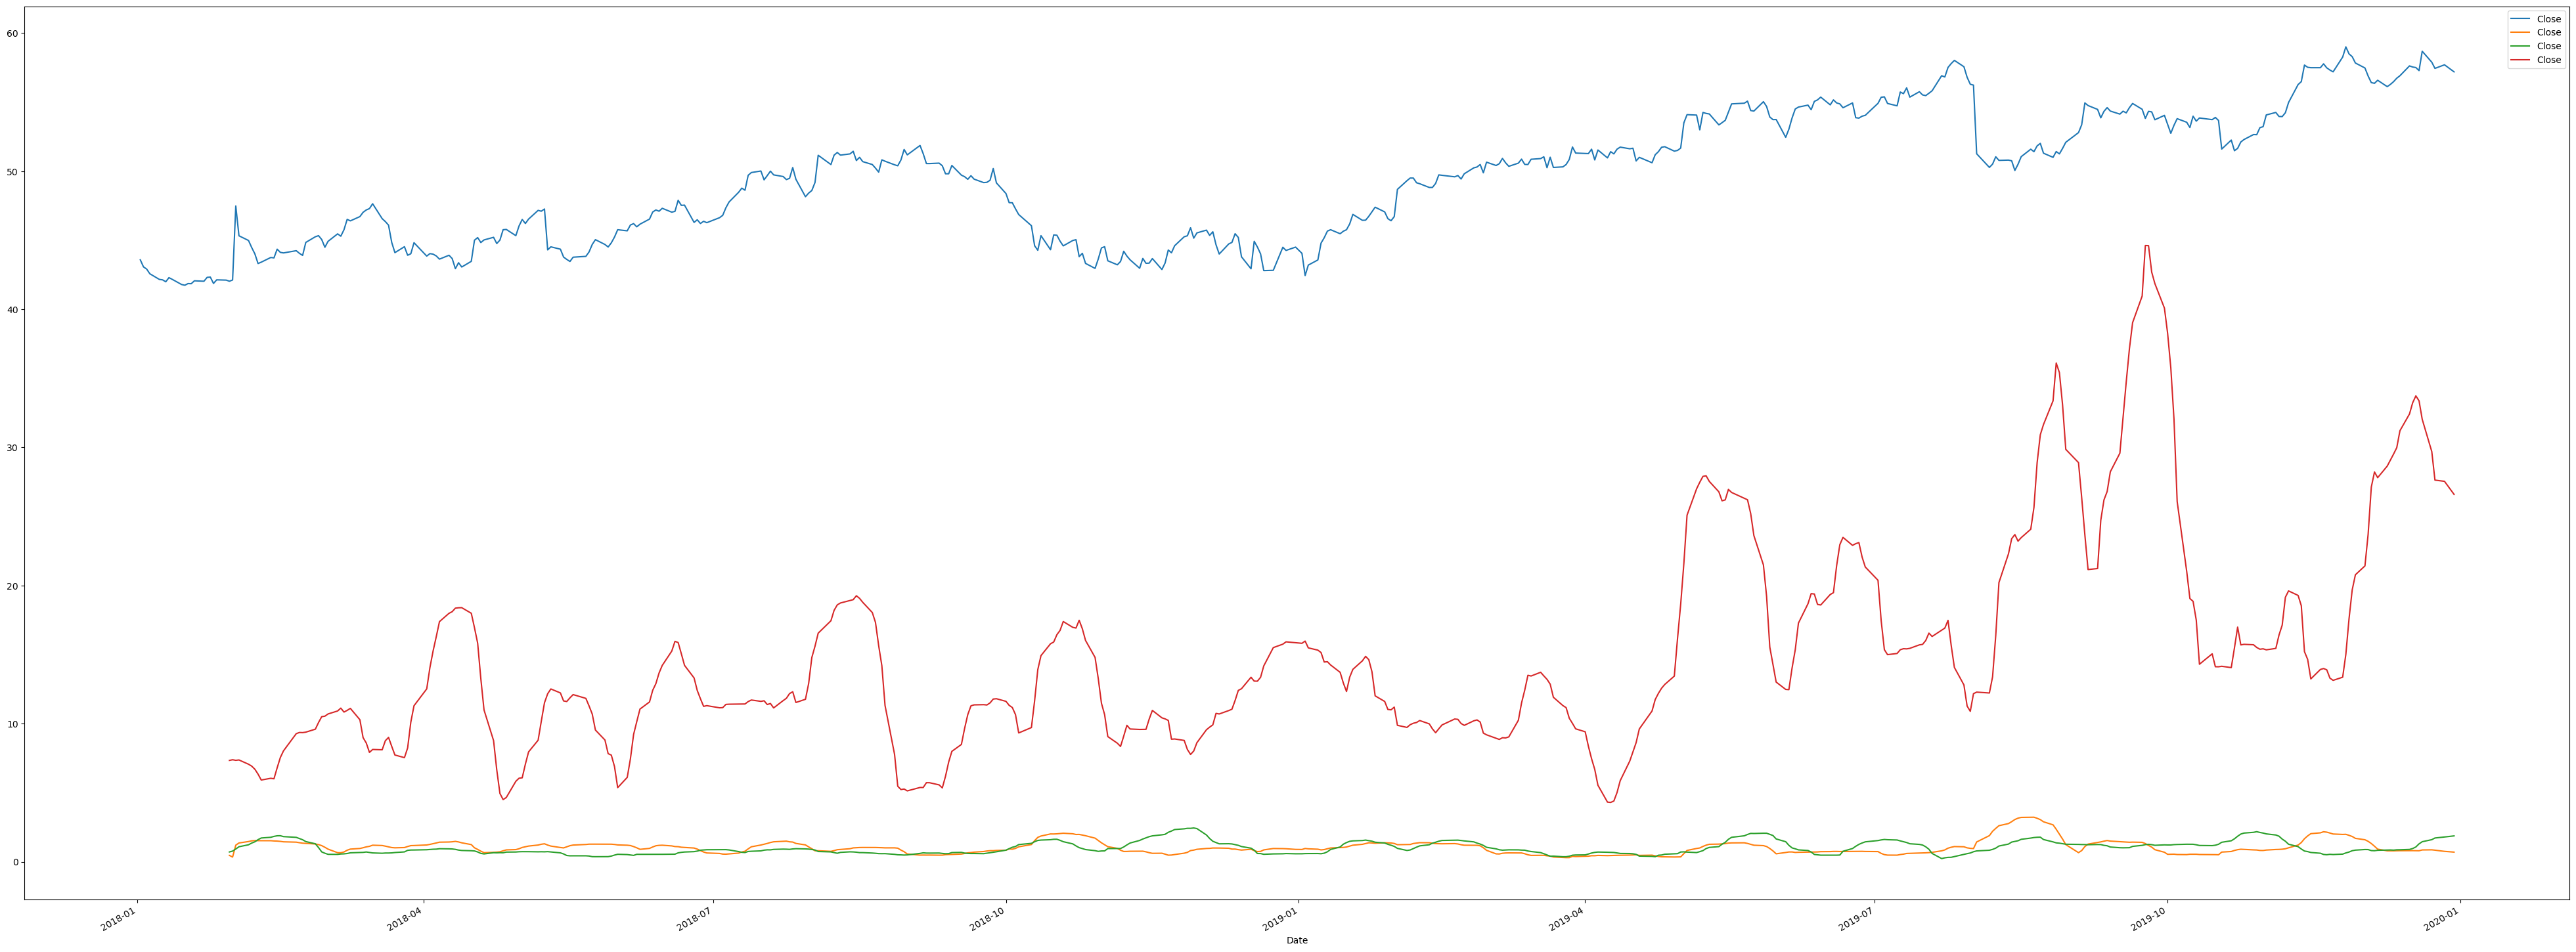

In [75]:
ax = otex.plot(figsize=(50, 20))
annual_std21_otex.plot(ax=ax)
annual_std21_l.plot(ax=ax)
annual_std21_shop.plot(ax=ax)

In [81]:
correlation2 = df_combined.corr()
print(correlation)

       Close
Close    1.0


In [82]:
correlation2.plot

In [84]:
covariance2 = df_combined.rolling(window=60).cov(combined_df["Close"])
variance = combined_df["Close"].rolling(60).var()

beta = covariance2/variance
print(beta)

beta.plot(figsize=(30, 15), title="Custom Portfolio")

TypeError: can only concatenate str (not "float") to str

In [88]:
sharpe_ratio2 = (df_combined_daily_returns.mean()*252)/(combined_daily_returns.std()*np.sqrt(252))
print(sharpe_ratio)

AttributeError: 'function' object has no attribute 'mean'

In [89]:
sharpe_ratio2.plot(kind="bar", title="Sharpe Ratio of combined returns")

NameError: name 'sharpe_ratio2' is not defined

I think that my portfolio is having a greater variation in the standard deviation from what i can see in the 21 day window graph presented. Also I
think that the algo portfolio and sptsx portfolio will have the lowest volatility of all as the top companies in sptsx will be made up of the biggest companies
which tend to have smaller fluctuation as a result of having more stable roots in the economy and having passed its early growing stages. From the assessment and the returns of the combined data frames we can see the growth in the whale/algo portfolios will have greater returns
as they also are working within a larger time frame (from 2015 as per data) and the data i used is from 2018 which means that as time goes there is an inherently higher risk
which mean there is a higher potential for return.  Thank you for taking the time to read and assess my assignment